C:\Users\HP\AppData\Local\Temp\ipykernel_26192\702586917.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_jobs.index, x=top_jobs.values, palette="Blues_d")


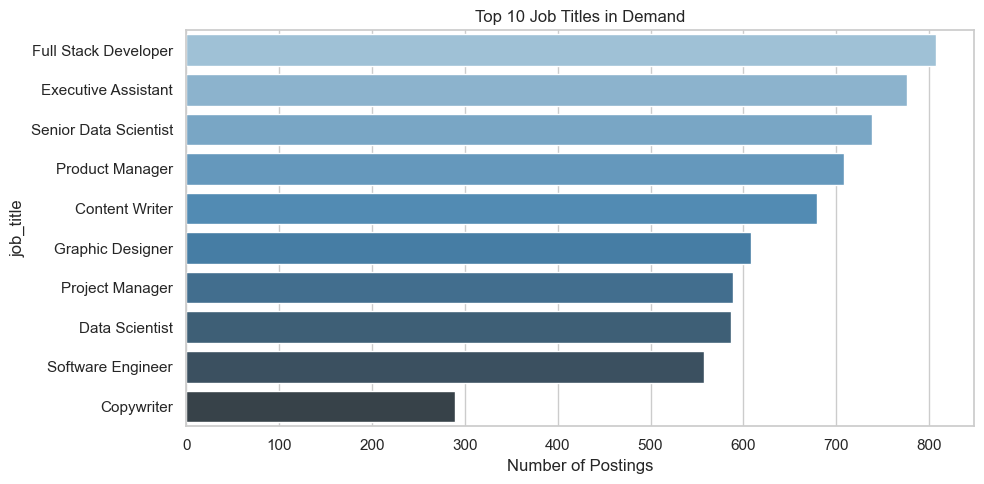

C:\Users\HP\AppData\Local\Temp\ipykernel_26192\702586917.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="Purples_d")


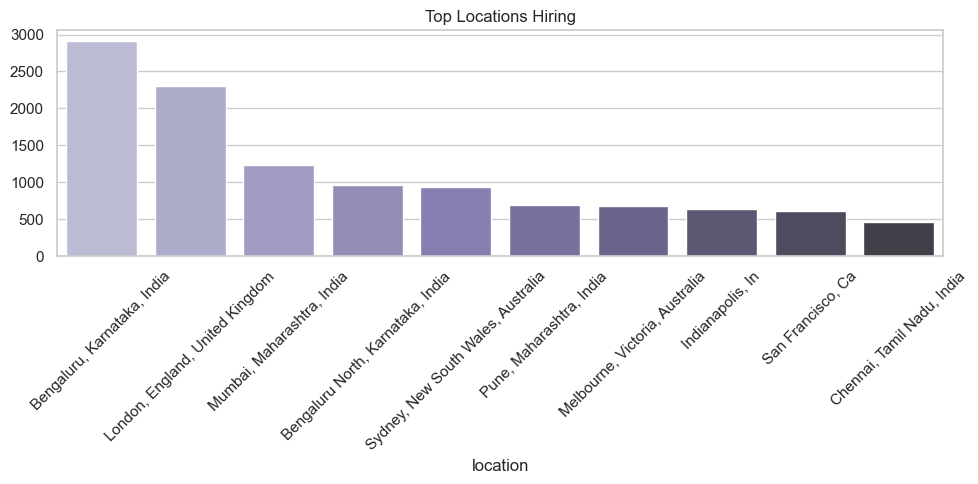

C:\Users\HP\AppData\Local\Temp\ipykernel_26192\702586917.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_count.index, y=industry_count.values, palette="Greens_d")


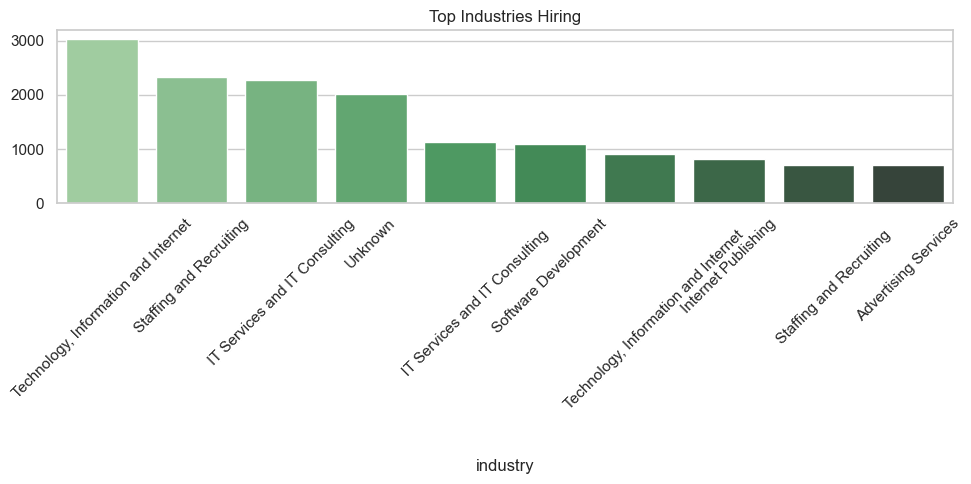

C:\Users\HP\AppData\Local\Temp\ipykernel_26192\702586917.py:69: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 2000x1000 with 0 Axes>

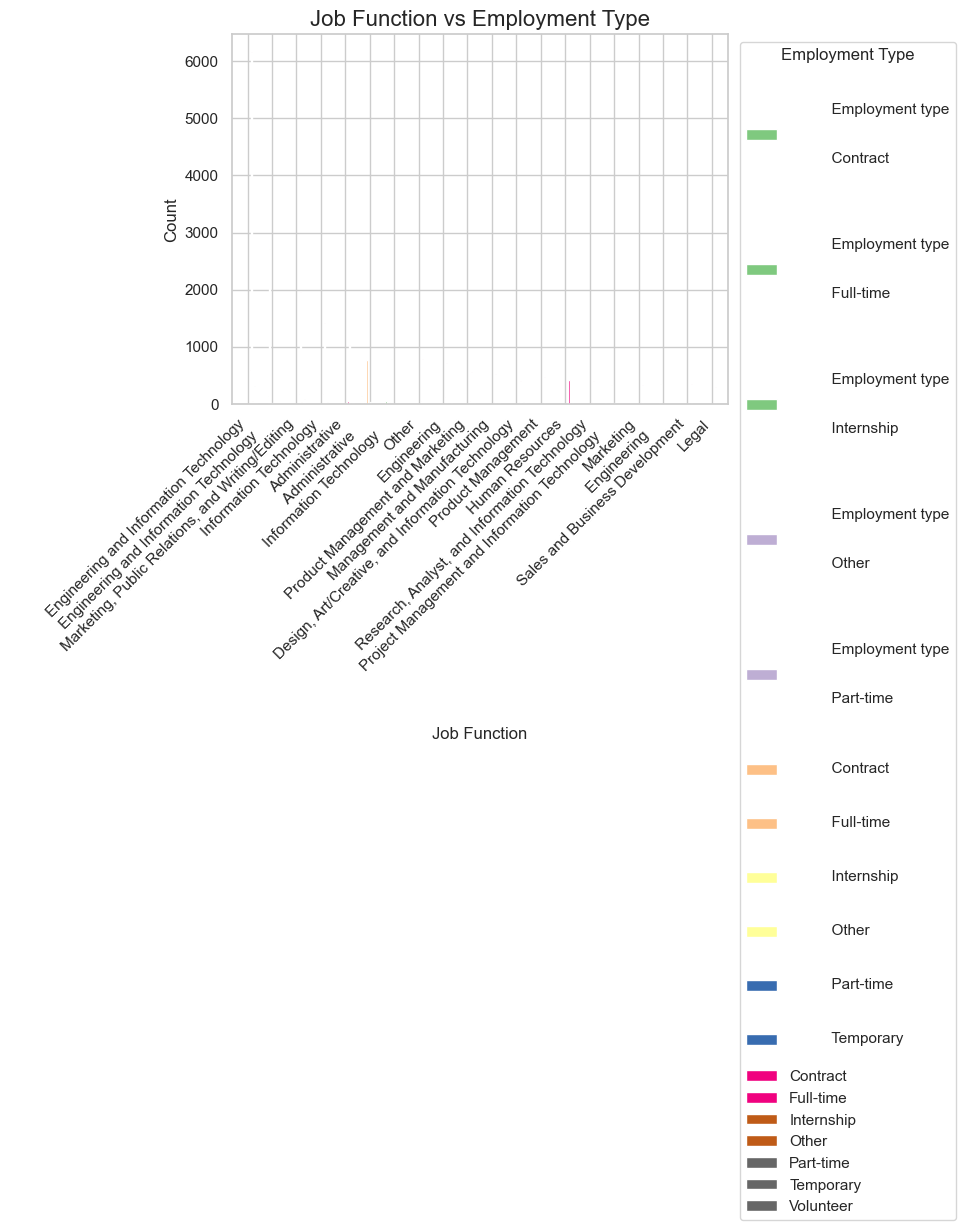

C:\Users\HP\AppData\Local\Temp\ipykernel_26192\702586917.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='seniority_level', palette='coolwarm', order=df['seniority_level'].value_counts().index)


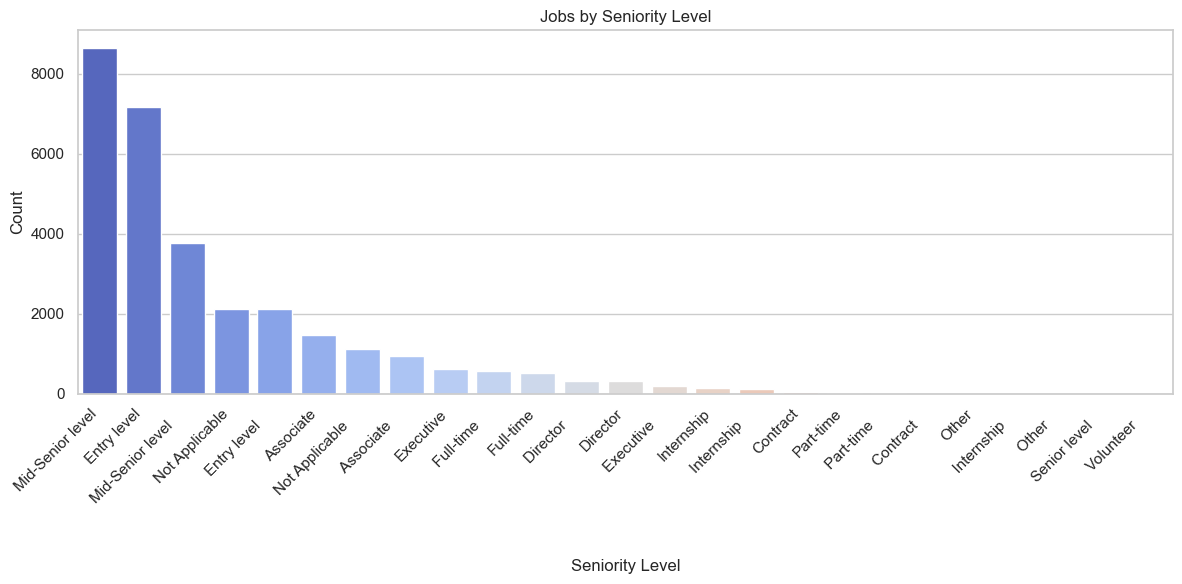

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("job_data.csv", encoding='latin1')
df.head()
# Remove leading/trailing spaces and line breaks
df.columns = df.columns.str.strip()
df['job_title'] = df['job_title'].astype(str).str.strip().str.replace('\n', '', regex=True).str.title()
df['location'] = df['location'].astype(str).str.strip().str.replace('\n', '', regex=True).str.title()
df['industry'] = df['industry'].fillna('Unknown')

# Drop rows where job title or location is missing
df = df.dropna(subset=['job_title', 'location'])

# Show cleaned data sample
df.head()
top_jobs = df['job_title'].value_counts().head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(y=top_jobs.index, x=top_jobs.values, palette="Blues_d")
plt.title("Top 10 Job Titles in Demand")
plt.xlabel("Number of Postings")
plt.tight_layout()
plt.savefig("top_job_titles.png")
plt.show()

top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="Purples_d")
plt.title("Top Locations Hiring")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_locations.png")
plt.show()
industry_count = df['industry'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=industry_count.index, y=industry_count.values, palette="Greens_d")
plt.title("Top Industries Hiring")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_industries.png")
plt.show()

# Your existing pivot code
pivot = pd.crosstab(df['job_function'], df['employment_type'])

# Optional: filter top job functions (avoid too many bars)
top_functions = pivot.sum(axis=1).nlargest(20).index
pivot = pivot.loc[top_functions]

# Plotting
plt.figure(figsize=(20, 10))  # Wider and taller figure
ax = pivot.plot(kind='bar', stacked=False, colormap='Accent', width=0.8)

# Titles and labels
plt.title("Job Function vs Employment Type", fontsize=16)
plt.xlabel("Job Function", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Fix x-axis label overlap
plt.xticks(rotation=45, ha='right')

# Move legend outside the plot
plt.legend(title='Employment Type', bbox_to_anchor=(1.01, 1), loc='upper left')

# Improve layout and save
plt.tight_layout()
plt.savefig("job_function_vs_employment_type.png")
plt.show()


plt.figure(figsize=(12,6))
sns.countplot(data=df, x='seniority_level', palette='coolwarm', order=df['seniority_level'].value_counts().index)
plt.title("Jobs by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotates and aligns text
plt.tight_layout()
plt.savefig("seniority_levels.png")
plt.show()


